In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest, RFE

import warnings
warnings.filterwarnings('ignore')

from acquire import acquire_zillow

In [2]:
df = acquire_zillow()
df.head()

Reading from csv file...


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,4.0,3.0,2962.0,773303.0,1950.0,6037.0


In [3]:
df.shape

(52442, 6)

In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52442 non-null  float64
 1   bathroomcnt                   52442 non-null  float64
 2   calculatedfinishedsquarefeet  52360 non-null  float64
 3   taxvaluedollarcnt             52441 non-null  float64
 4   yearbuilt                     52326 non-null  float64
 5   fips                          52442 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


In [5]:
df.isnull().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
taxvaluedollarcnt                 1
yearbuilt                       116
fips                              0
dtype: int64

In [6]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
count,52442.000000,52442.000000,52360.000000,5.244100e+04,52326.000000,52442.000000
mean,3.300675,2.299397,1922.874083,5.296830e+05,1963.393820,6049.131917
std,0.949086,1.022764,1004.363491,7.518883e+05,23.133355,21.028933
min,0.000000,0.000000,128.000000,1.000000e+03,1878.000000,6037.000000
25%,3.000000,2.000000,1268.000000,1.937500e+05,1950.000000,6037.000000
50%,3.000000,2.000000,1659.000000,3.736120e+05,1961.000000,6037.000000
75%,4.000000,3.000000,2306.000000,6.193010e+05,1979.000000,6059.000000
max,14.000000,18.000000,21929.000000,4.906124e+07,2016.000000,6111.000000


In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
fips                            0
dtype: int64

In [9]:
df.shape

(52320, 6)

In [10]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
count,52320.000000,52320.000000,52320.000000,5.232000e+04,52320.000000,52320.000000
mean,3.305906,2.302781,1922.537309,5.280717e+05,1963.394438,6049.085168
std,0.940568,1.019058,1003.615675,7.484542e+05,23.133385,20.984528
min,0.000000,0.000000,128.000000,1.000000e+03,1878.000000,6037.000000
25%,3.000000,2.000000,1268.000000,1.937155e+05,1950.000000,6037.000000
50%,3.000000,2.000000,1658.000000,3.733765e+05,1961.000000,6037.000000
75%,4.000000,3.000000,2305.000000,6.186230e+05,1979.000000,6059.000000
max,14.000000,18.000000,21929.000000,4.906124e+07,2016.000000,6111.000000


In [11]:
train_val, test = train_test_split(df, train_size = 0.8, random_state=123)
train, validate = train_test_split(train_val, train_size = 0.7, random_state=123)
train.shape, validate.shape, test.shape

((29299, 6), (12557, 6), (10464, 6))

In [12]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
8251,4.0,2.0,2226.0,594178.0,1969.0,6111.0
32319,4.0,4.5,6888.0,11317682.0,2010.0,6059.0
42134,3.0,2.0,1882.0,540822.0,2002.0,6059.0
44913,4.0,2.0,1575.0,70231.0,1971.0,6059.0
34101,4.0,1.5,1902.0,1049750.0,1954.0,6059.0


In [13]:
train.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
count,29299.000000,29299.000000,29299.000000,2.929900e+04,29299.000000,29299.000000
mean,3.303492,2.301256,1922.406499,5.293537e+05,1963.466398,6049.094884
std,0.940538,1.022850,1012.166980,7.733904e+05,23.072141,20.985860
min,0.000000,0.000000,152.000000,1.000000e+03,1880.000000,6037.000000
25%,3.000000,2.000000,1265.500000,1.925995e+05,1950.000000,6037.000000
50%,3.000000,2.000000,1655.000000,3.729720e+05,1961.000000,6037.000000
75%,4.000000,3.000000,2302.000000,6.148450e+05,1979.000000,6059.000000
max,14.000000,18.000000,21929.000000,4.906124e+07,2016.000000,6111.000000


In [14]:
def remove_outliers(df, k, col_list):
    ''' this function will remove outliers from a list of columns in a dataframe 
        and return that dataframe. A list of columns with significant outliers is 
        assigned to a variable in the below wrangle function and can be modified if needed
    '''
    #loop throught the columns in the list
    for col in col_list:
        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        iqr = q3 - q1   # calculate interquartile range
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound
        # return dataframe without outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)] 
    return df

In [15]:
out_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',]
train = remove_outliers(train, 1.5, out_columns)
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
8251,4.0,2.0,2226.0,594178.0,1969.0,6111.0
42134,3.0,2.0,1882.0,540822.0,2002.0,6059.0
44913,4.0,2.0,1575.0,70231.0,1971.0,6059.0
34101,4.0,1.5,1902.0,1049750.0,1954.0,6059.0
19557,3.0,2.0,1538.0,258373.0,1986.0,6059.0


In [16]:
train.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
count,26695.000000,26695.000000,26695.000000,2.669500e+04,26695.000000,26695.000000
mean,3.217044,2.132309,1733.751939,4.321291e+05,1962.183105,6048.883873
std,0.789353,0.745034,629.565055,4.047018e+05,21.952218,20.875165
min,2.000000,1.000000,152.000000,1.000000e+03,1880.000000,6037.000000
25%,3.000000,2.000000,1250.000000,1.806810e+05,1950.000000,6037.000000
50%,3.000000,2.000000,1600.000000,3.514640e+05,1959.000000,6037.000000
75%,4.000000,3.000000,2115.000000,5.568360e+05,1977.000000,6059.000000
max,5.000000,4.000000,3538.000000,1.061040e+07,2016.000000,6111.000000


In [17]:
train.shape

(26695, 6)

In [18]:
x_train = train[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']]
y_train = train[['taxvaluedollarcnt']]
x_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt
8251,4.0,2.0,2226.0,1969.0
42134,3.0,2.0,1882.0,2002.0
44913,4.0,2.0,1575.0,1971.0
34101,4.0,1.5,1902.0,1954.0
19557,3.0,2.0,1538.0,1986.0


In [19]:
y_train.head()

,taxvaluedollarcnt
8251,594178.0
42134,540822.0
44913,70231.0
34101,1049750.0
19557,258373.0


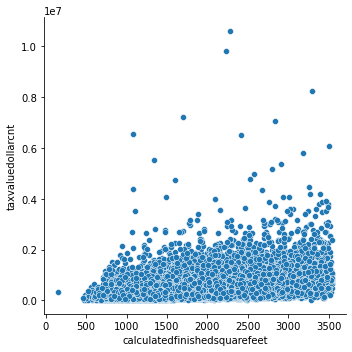

In [20]:

sns.relplot(x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data=train)
plt.show()

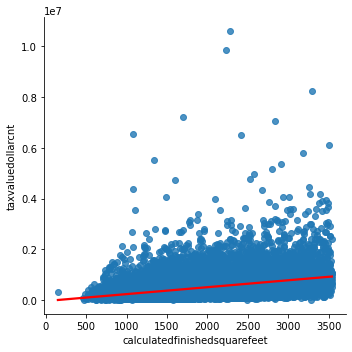

In [21]:
sns.lmplot(x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data=train, line_kws={'color': 'red'})
plt.show()

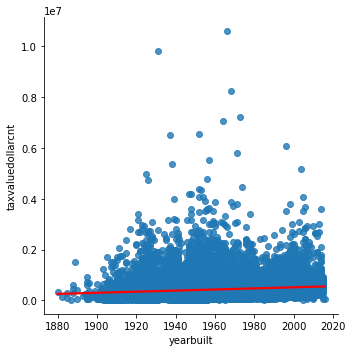

In [22]:
sns.lmplot(x='yearbuilt', y='taxvaluedollarcnt', data=train, line_kws={'color': 'red'})
plt.show()

<AxesSubplot:xlabel='yearbuilt', ylabel='taxvaluedollarcnt'>

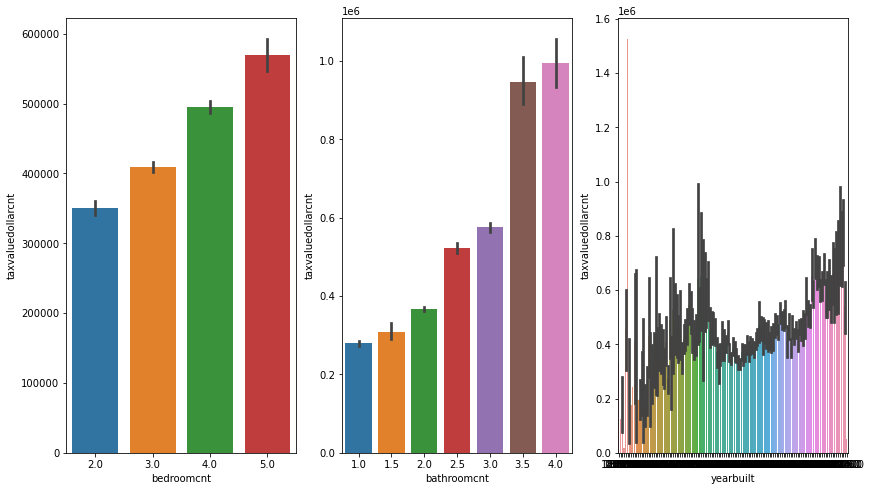

In [23]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 8))
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt', data=train, ax=ax[0])
sns.barplot(x='bathroomcnt', y='taxvaluedollarcnt', data=train, ax=ax[1])
sns.barplot(x='yearbuilt', y='taxvaluedollarcnt', data=train, ax=ax[2])

In [24]:
#create a min-max scaler object
scaler = MinMaxScaler()
#fit the scaler with the train data
scaler.fit(x_train)
#output the results of the scaler into a new df to use with feature selection
x_train_scaled = scaler.transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt
8251,0.666667,0.333333,0.612522,0.654412
42134,0.333333,0.333333,0.510927,0.897059
44913,0.666667,0.333333,0.420260,0.669118
34101,0.666667,0.166667,0.516834,0.544118
19557,0.333333,0.333333,0.409333,0.779412


In [25]:
x_validate = validate[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']]
x_validate.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt
32004,2.0,1.0,820.0,1925.0
44332,3.0,2.0,704.0,1939.0
21552,3.0,3.0,2115.0,1996.0
21019,3.0,2.0,1183.0,1953.0
38671,3.0,2.0,1245.0,1954.0


In [26]:
x_validate.shape

(12557, 4)

In [27]:
predictions = pd.DataFrame({'actual': validate.taxvaluedollarcnt})
predictions.head()

,actual
32004,23350.0
44332,246427.0
21552,638000.0
21019,117407.0
38671,73174.0


In [28]:
predictions.shape

(12557, 1)

In [29]:

x_validate_scaled = scaler.transform(x_validate)
x_validate_scaled_df = pd.DataFrame(x_validate_scaled, columns=x_train.columns, index=x_validate.index)
x_validate_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt
32004,0.000000,0.000000,0.197283,0.330882
44332,0.333333,0.333333,0.163024,0.433824
21552,0.333333,0.666667,0.579740,0.852941
21019,0.333333,0.333333,0.304489,0.536765
38671,0.333333,0.333333,0.322800,0.544118


---

##### Auto feature selection

In [30]:
x = x_train_scaled_df
y = y_train
kbest = SelectKBest(f_regression, k=2)
kbest.fit(x, y)
print('Top 2 features according to k-best:')
x.columns[kbest.get_support()]

Top 2 features according to k-best:


Index(['bathroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')

In [31]:
x = x_train_scaled_df
y = y_train
kbest = SelectKBest(f_regression, k=1)
kbest.fit(x, y)
print('Top 1 features according to k-best:')
x.columns[kbest.get_support()]

Top 1 features according to k-best:


Index(['calculatedfinishedsquarefeet'], dtype='object')

In [32]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=2).fit(x, y)
print('Top 1 features according to RFE:')
x.columns[rfe.get_support()]

Top 1 features according to RFE:


Index(['bedroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')

In [54]:
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index=x.columns)

,rfe_ranking
bedroomcnt,1
bathroomcnt,3
calculatedfinishedsquarefeet,1
yearbuilt,2


---

#### Modeling

In [33]:
x = x_train_scaled_df[['calculatedfinishedsquarefeet']]
z = x_validate_scaled_df[['calculatedfinishedsquarefeet']]
lm = LinearRegression()
lm.fit(x, y_train)
predictions['simple_lm'] = lm.predict(z)
predictions.head()

,actual,simple_lm
32004,23350.0,182438.017207
44332,246427.0,150739.954684
21552,638000.0,536308.629002
21019,117407.0,281631.092174
38671,73174.0,298573.160074


In [35]:
mr = LinearRegression()
rfe_top_two = x_train_scaled_df[['calculatedfinishedsquarefeet', 'bedroomcnt']]
mr.fit(rfe_top_two, y_train)
val_rfe_top_two = x_validate_scaled_df[['calculatedfinishedsquarefeet', 'bedroomcnt']]
predictions['multiple_rfe'] = mr.predict(val_rfe_top_two)
predictions.head()

,actual,simple_lm,multiple_rfe
32004,23350.0,182438.017207,228173.610336
44332,246427.0,150739.954684,103505.565725
21552,638000.0,536308.629002,579241.197211
21019,117407.0,281631.092174,265006.180524
38671,73174.0,298573.160074,285910.226699


In [37]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(x_train_scaled_df)
x_train_poly = pd.DataFrame(
    poly.transform(x_train_scaled_df),
    columns=poly.get_feature_names(x_train_scaled_df.columns),
    index=x_train_scaled_df.index,
)
x_train_poly.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,bedroomcnt^2,bedroomcnt bathroomcnt,bedroomcnt calculatedfinishedsquarefeet,bedroomcnt yearbuilt,bathroomcnt^2,bathroomcnt calculatedfinishedsquarefeet,bathroomcnt yearbuilt,calculatedfinishedsquarefeet^2,calculatedfinishedsquarefeet yearbuilt,yearbuilt^2
8251,0.666667,0.333333,0.612522,0.654412,0.444444,0.222222,0.408348,0.436275,0.111111,0.204174,0.218137,0.375183,0.400842,0.428255
42134,0.333333,0.333333,0.510927,0.897059,0.111111,0.111111,0.170309,0.299020,0.111111,0.170309,0.299020,0.261047,0.458332,0.804715
44913,0.666667,0.333333,0.420260,0.669118,0.444444,0.222222,0.280173,0.446078,0.111111,0.140087,0.223039,0.176618,0.281203,0.447718
34101,0.666667,0.166667,0.516834,0.544118,0.444444,0.111111,0.344556,0.362745,0.027778,0.086139,0.090686,0.267117,0.281219,0.296064
19557,0.333333,0.333333,0.409333,0.779412,0.111111,0.111111,0.136444,0.259804,0.111111,0.136444,0.259804,0.167553,0.319039,0.607483


In [38]:
poly_rm = LinearRegression()
poly_rm.fit(x_train_poly, y_train)

x_validate_poly = poly.transform(x_validate_scaled_df)
predictions['polynomial degree 2'] = poly_rm.predict(x_validate_poly)
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2
32004,23350.0,182438.017207,228173.610336,270132.472523
44332,246427.0,150739.954684,103505.565725,219493.657189
21552,638000.0,536308.629002,579241.197211,559928.659516
21019,117407.0,281631.092174,265006.180524,283092.332215
38671,73174.0,298573.160074,285910.226699,294293.314806


In [39]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly.fit(x_train_scaled_df)
x_train_poly = pd.DataFrame(
    poly.transform(x_train_scaled_df),
    columns=poly.get_feature_names(x_train_scaled_df.columns),
    index=x_train_scaled_df.index,
)
lm = LinearRegression()
lm.fit(x_train_poly, y_train)

x_validate_poly = poly.transform(x_validate_scaled_df)
predictions['polynomial only interaction'] = lm.predict(x_validate_poly)
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction
32004,23350.0,182438.017207,228173.610336,270132.472523,264225.822817
44332,246427.0,150739.954684,103505.565725,219493.657189,184258.353066
21552,638000.0,536308.629002,579241.197211,559928.659516,562760.081133
21019,117407.0,281631.092174,265006.180524,283092.332215,293372.569808
38671,73174.0,298573.160074,285910.226699,294293.314806,307893.907807


In [40]:
predictions['baseline'] = train.taxvaluedollarcnt.mean()
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction,baseline
32004,23350.0,182438.017207,228173.610336,270132.472523,264225.822817,432129.104102
44332,246427.0,150739.954684,103505.565725,219493.657189,184258.353066,432129.104102
21552,638000.0,536308.629002,579241.197211,559928.659516,562760.081133,432129.104102
21019,117407.0,281631.092174,265006.180524,283092.332215,293372.569808,432129.104102
38671,73174.0,298573.160074,285910.226699,294293.314806,307893.907807,432129.104102


In [41]:
def calculate_mse(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted)

predictions.apply(calculate_mse)

actual                         0.000000e+00
simple_lm                      3.580679e+11
multiple_rfe                   3.476296e+11
polynomial degree 2            3.121204e+11
polynomial only interaction    3.027980e+11
baseline                       5.145928e+11
dtype: float64

In [42]:
import math 

In [43]:
predictions.apply(calculate_mse).apply(math.sqrt)

actual                              0.000000
simple_lm                      598387.779837
multiple_rfe                   589601.189293
polynomial degree 2            558677.387305
polynomial only interaction    550270.829353
baseline                       717351.221095
dtype: float64